# Rutledge simulations

Simulating effects of L-Dopa on gambling propsensity from Rutledge et al 2015

In [204]:
import numpy as np
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import importlib

# my modules
import rutledge

In [205]:
importlib.reload(rutledge)

<module 'rutledge' from '/Users/ajaskir/Desktop/FYP/opal/notebooks/rutledge.py'>

In [206]:
# intialize parameters
n_subjects = 30
alpha_a = 0.1 # no actor update
alpha_c = 0.2 # explict values, so no learning 
beta = 1.5
k = 1.
rho = 0.

n_trials = 300  # 100 for each trial type gain/mix/loss
params = (alpha_c, alpha_a, beta)
plot_all = False

In [207]:
# randomly generated random seeds and rhos, saved here for reproducibility
rnd_seeds_log = [4213, 66069, 83512, 29701, 79726, 23049, 57784, 71428, 96031, 61623, 13978,  8013, 10393, 37741, 13282, 57196, 74610, 41480, 49507, 78148, 87140, 91052, 86720, 12629, 60062,  7244, 33269,   215, 54199, 19515]
rhos = [0.34642773114827397, 0.8779549835036025, 0.5124465696101922, 0.22431855190391103, 0.14420812381243314, 0.4532018530303998, 0.39427441926778817, 0.5101899903699745, 0.6178993470336577, 0.8047453524824475, 0.2598315609730376, 0.7258835065784357, 0.6709192389105719, 0.8612184413244048, 0.5466629235102415, 0.4404398026885024, 0.5456925797634166, 0.7501516213803597, 0.880680676613087, 0.3595048197805297, 0.30593602625885935, 0.6748909864147761, 0.6685710045131589, 0.25234900920562553, 0.6234760265863974, 0.22205150330379392, 0.6710539263940898, 0.7922437786185152, 0.1970335906820172, 0.30257003425569673]

In [208]:
diff = []
states_off = [] #accumulate for plotting
states_on = []

# uncomment below to run new random seeds and rho
# rnd_seeds = []
# rhos = []

counter = 0
while (counter < n_subjects):
    
    # use same rhos and random seeds
    # comment below to run new random seeds and rho
    rnd_seed = rnd_seeds_log[counter]
    d = np.random.normal(loc=.5, scale=.25)
    d = rhos[counter]

    # uncomment below to run new random seeds and rho
    # rnd_seed = random.randint(1,100000)         # use same random seed to limit variance
    # rnd_seeds = np.append(rnd_seeds,rnd_seed)   # save results
    # d = np.random.normal(loc=.5, scale=.25)
    # while d < 0:
    #     d = np.random.normal(loc=.5, scale=.25)
    # rhos.append(d)
    
    
    state_off = rutledge.simulate(params,1,v0=0.0, mod = "value",k=k,rnd_seed = rnd_seed)
    states_off.append(state_off[0])
    gains_off = np.where(state_off[0].trial_type == 0)
    gambles_off = sum(state_off[0].C[gains_off] == 1)
    
    state_on = rutledge.simulate(params,1,v0=0.0, mod = "value_drug",k=k,d=d,rnd_seed = rnd_seed)
    states_on.append(state_on[0])
    gains_on = np.where(state_on[0].trial_type == 0)
    gambles_on = sum(state_on[0].C[gains_on] == 1)
    
    diff.append(gambles_on - gambles_off)
    
    counter += 1

SpearmanrResult(correlation=0.5007951786445946, pvalue=0.004821426149992512)

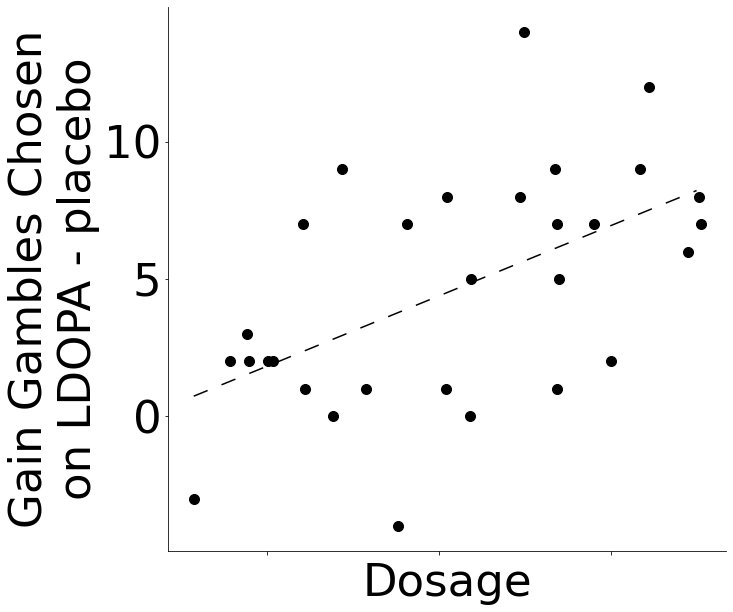

In [209]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(rhos,diff, color = "black", s = 100)
m, b = np.polyfit(rhos, diff, 1) #regression line
xaxis = np.arange(min(rhos),max(rhos),0.01)
ax.plot(xaxis,m*xaxis+b,linestyle=(0,(10,10)),color = "black")
plt.ylabel("Gain Gambles Chosen\non LDOPA - placebo")
plt.xlabel("Dosage")
ax.set_xticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
stats.spearmanr(diff, rhos)

In [210]:
np.arange(min(rhos),max(rhos),0.01)

array([0.14420812, 0.15420812, 0.16420812, 0.17420812, 0.18420812,
       0.19420812, 0.20420812, 0.21420812, 0.22420812, 0.23420812,
       0.24420812, 0.25420812, 0.26420812, 0.27420812, 0.28420812,
       0.29420812, 0.30420812, 0.31420812, 0.32420812, 0.33420812,
       0.34420812, 0.35420812, 0.36420812, 0.37420812, 0.38420812,
       0.39420812, 0.40420812, 0.41420812, 0.42420812, 0.43420812,
       0.44420812, 0.45420812, 0.46420812, 0.47420812, 0.48420812,
       0.49420812, 0.50420812, 0.51420812, 0.52420812, 0.53420812,
       0.54420812, 0.55420812, 0.56420812, 0.57420812, 0.58420812,
       0.59420812, 0.60420812, 0.61420812, 0.62420812, 0.63420812,
       0.64420812, 0.65420812, 0.66420812, 0.67420812, 0.68420812,
       0.69420812, 0.70420812, 0.71420812, 0.72420812, 0.73420812,
       0.74420812, 0.75420812, 0.76420812, 0.77420812, 0.78420812,
       0.79420812, 0.80420812, 0.81420812, 0.82420812, 0.83420812,
       0.84420812, 0.85420812, 0.86420812, 0.87420812])

In [211]:
# mod w/ value
gain_gamblesV = []
loss_gamblesV = []
mix_gamblesV = []
for state in states_off:
    
    # gain trials
    gains = np.where(state.trial_type == 0)
    gambles = sum(state.C[gains] == 1)
    gain_gamblesV.append(gambles)
    
    # loss trials
    loss = np.where(state.trial_type == 1)
    gambles = sum(state.C[loss] == 1)
    loss_gamblesV.append(gambles)
    
    # mix trials
    mix = np.where(state.trial_type == 2)
    gambles = sum(state.C[mix] == 1)
    mix_gamblesV.append(gambles)

gain_meanV = np.mean(gain_gamblesV)
loss_meanV = np.mean(loss_gamblesV)
mix_meanV = np.mean(mix_gamblesV)

gain_semV = stats.sem(gain_gamblesV)
loss_semV = stats.sem(loss_gamblesV)
mix_semV = stats.sem(mix_gamblesV)

# mod w/ value + drug
# gambles w/ drug
gain_gamblesD = []
loss_gamblesD = []
mix_gamblesD = []
for state in states_on:
    
    # gain trials
    gains = np.where(state.trial_type == 0)
    gambles = sum(state.C[gains] == 1)
    gain_gamblesD.append(gambles)
    
    # loss trials
    loss = np.where(state.trial_type == 1)
    gambles = sum(state.C[loss] == 1)
    loss_gamblesD.append(gambles)
    
    # mix trials
    mix = np.where(state.trial_type == 2)
    gambles = sum(state.C[mix] == 1)
    mix_gamblesD.append(gambles)

gain_meanD = np.mean(gain_gamblesD)
loss_meanD = np.mean(loss_gamblesD)
mix_meanD = np.mean(mix_gamblesD)

gain_semD = stats.sem(gain_gamblesD)
loss_semD = stats.sem(loss_gamblesD)
mix_semD = stats.sem(mix_gamblesD)

plot_me = np.array([[0, mix_meanV, mix_meanD],
                    [0, gain_meanV, gain_meanD],
                    [0, loss_meanV, loss_meanD]])
plot_err = np.array([[0, mix_semV, mix_semD],
                     [0, gain_semV, gain_semD],
                    [0, loss_semV, loss_semD]])
x = np.array([1,2,3])

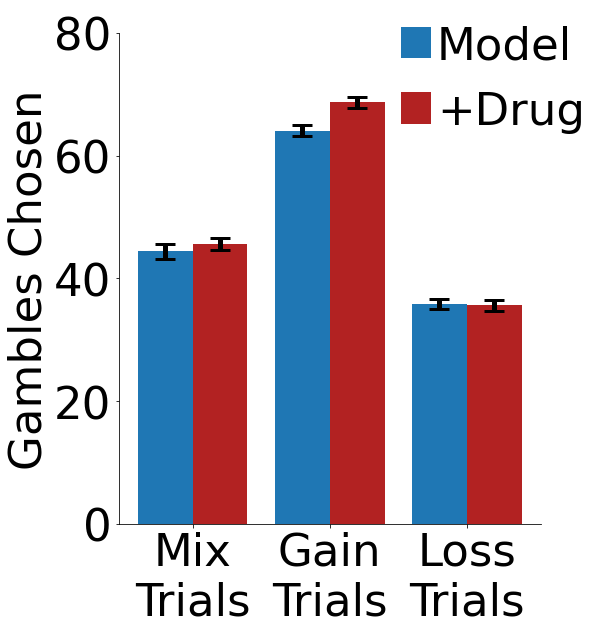

In [212]:
# plot gambles chosen by trial type
fig, ax = plt.subplots(figsize=(10, 10))
x = np.array([.5,1,1.5])
ax.bar(x-.1, plot_me[:,1], linewidth= 100, yerr = plot_err[:,1],width=0.2, capsize=10, error_kw=dict(lw=5, capthick=3))
ax.bar(x+.1, plot_me[:,2], yerr = plot_err[:,2],width=0.2, capsize=10, color = "firebrick", error_kw=dict(lw=5, capthick=3))
#ax.set_ylim([.3,.5])
my_xticks = ['Mix\nTrials','Gain\nTrials','Loss\nTrials']
plt.xticks(x, my_xticks)
plt.ylabel("Gambles Chosen")
plt.rcParams.update({'font.size': 45})
lgnd = ax.legend(["Model", "+Drug"],loc='upper right', bbox_to_anchor=(1.2, 1.1), markerscale = .1, fancybox = False, frameon = False)
lgnd.legendHandles[0].set_width(30)
lgnd.legendHandles[0].set_xy([90,0.])
lgnd.legendHandles[1].set_width(30)
lgnd.legendHandles[1].set_xy([90, 0.])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.ylim([0,80])
plt.show()

In [213]:
# print(rnd_seeds)

In [214]:
# print(rhos)